In [1]:
fdir = "../scripts/hanglog/dd_2020_12_11_101346"

import os
logfiles = os.listdir(fdir)
print(logfiles)
fLog = os.path.join(fdir, logfiles[0])

['hdata-2020-12-11_10-13-46.log']


In [2]:
import sys
sys.path.append("..")
import hacktrack.loaders
fd = hacktrack.loaders.FlyDat(fLog)

Extracting knowndate from filename: 2020-12-11
badline End(7563,2088)

Y:3755, Z:3796, U:12, aF:206, aA:1678, aZ:203
linAdifftime 347044.2369402985 count 268
Made for Q 0 last index 0
Made for V 0 last index 0
Loading aQV as no pQV records
Made for aQ 0 last index 0
Made for aV 0 last index 0
Missing GPS data, so setting t0 to 2020-12-11 09:16:27.718237


In [3]:
fd.LoadC("ZY")

Made for Z 3796 last index 3796
Warning, using guessed (not GPS) timing corrected value on Z 3796
pCattrname pZ
Made for Y 3755 last index 3755
Warning, using guessed (not GPS) timing corrected value on Y 3755
pCattrname pY


2

In [4]:
fd.pY.head()

,ax,ay,az,gx,gy,gz,q0,q1,q2,q3,iqsq,pitch,roll,heading,bad
2020-12-11 10:13:46.256237,-0.01,-0.03,0.03,1.28,1.96,-9.52,1692.0,16255.0,-549.0,1029.0,3.725114e-09,11.577795,7.558364,93.094530,False
2020-12-11 10:13:46.300237,-0.04,0.00,0.00,1.28,1.96,-9.52,1692.0,16255.0,-549.0,1029.0,3.725114e-09,11.577795,7.558364,93.094530,False
2020-12-11 10:13:46.308237,-0.03,-0.01,-0.02,1.28,1.96,-9.52,1692.0,16255.0,-549.0,1028.0,3.725143e-09,11.578125,7.551422,93.095234,False
2020-12-11 10:13:46.319237,-0.03,0.00,0.00,1.28,1.96,-9.52,1692.0,16255.0,-549.0,1028.0,3.725143e-09,11.578125,7.551422,93.095234,False
2020-12-11 10:13:46.327237,0.00,-0.01,-0.02,1.28,1.96,-9.52,1692.0,16255.0,-549.0,1028.0,3.725143e-09,11.578125,7.551422,93.095234,False


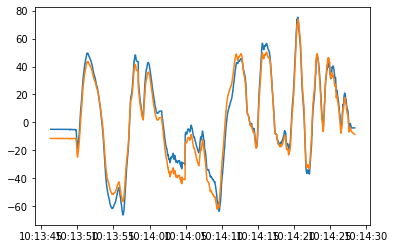

In [14]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pZ = fd.pZ[~fd.pZ.bad]
pY = fd.pY[~fd.pY.bad]
plt.plot(pZ.pitch)
plt.plot(-pY.pitch)

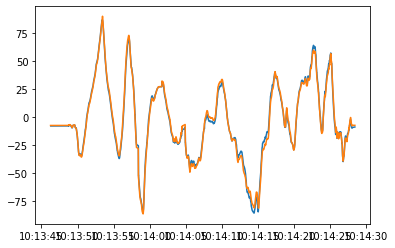

In [16]:
plt.plot(pZ.roll)
plt.plot(-pY.roll)

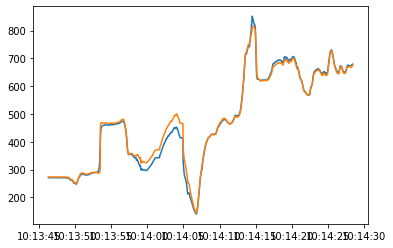

In [18]:
plt.plot(pZ.heading)
plt.plot(pY.heading+180)